# Data Science & Business Analytics Tasks
<font size=6>
    BY - SAGNICK BHAR


<font color='blue'>
<font size=4>

## TASK 4 - Exploratory Data Analysis - Terrorism


# Overview of the Problem set #

**Problem Statement**: 
To Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’.

# Importing Packages #

First, let's import all the packages that will be needed during this assignment. 

In [86]:
# Importing the libraries ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
import time
from IPython.display import clear_output
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [88]:
# Loading the ‘Global Terrorism’ dataset ---

df=pd.read_csv('../input/da-terrorism/globalterrorismdb_0718dist.csv')
print('Data Successfully Imported')

df.head() # See the first 5 rows

Data Successfully Imported


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [89]:
#Printing last five row
df.tail()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [91]:
# To know number of rows and columns
df.shape

(181691, 135)

In [92]:
cols = df.columns
cols

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [94]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


# Exploratory Data Analysis #


Here we collect useful columns for our analysis. We kept 20 out of 153 columns from the original data.

In [95]:
#Rename columns in order to get better format
df.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 
                          'extended':'Extended', 'resolution':'Resolution',  'attacktype1_txt':'Attacktype', 
                          'country_txt':'Country', 'region_txt':'Region', 'provstate': 'Provstate', 
                          'city':'City', 'crit1':'Crit1', 'crit2':'Crit2', 
                          'crit3':'Crit3', 'multiple':'Multiple', 'success':'Success', 'suicide':'Suicide', 
                          'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 'natlty2_txt':'Natlty2', 
                          'natlty3_txt':'Natlty3', 'gname':'Gname', 'gname2':'Gname2', 'gname3':'Gname3', 
                          'guncertain1':'Guncertain1', 'guncertain2':'Guncertain2', 'guncertain3':'Guncertain3', 
                          'claimed':'Claimed', 'weaptype1_txt':'Weaptype', 'weapsubtype1_txt':'Weapsubtype', 
                          'nkill':'Nkill', 'nkillus':'Nkillus', 'nkillter':'Nkillter', 'nwound':'Nwound', 
                          'nwoundus':'Nwoundus', 'nwoundte':'Nwoundter', 'property':'Property', 
                          'propextent_txt':'Propextent', 'propvalue':'Propvalue', 'ishostkid':'Ishostkid', 
                          'nhostkid':'Nhostkid', 'nhostkidus':'Nhostkidus', 'ransom':'Ransom', 
                          'hostkidoutcome':'Hostkidoutcome', 'nreleased':'Nreleased'},inplace=True)

#Keep 20 columns
data = df[['Eventid', 'Year','Country', 'Region', 'Provstate', 'City', 'Crit1', 'Crit2', 'Crit3', 
                  'Success', 'Suicide', 'Attacktype', 'Targtype', 'Natlty1','Gname', 'Guncertain1', 
                  'Claimed', 'Weaptype', 'Nkill','Nwound']]

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Eventid      181691 non-null  int64  
 1   Year         181691 non-null  int64  
 2   Country      181691 non-null  object 
 3   Region       181691 non-null  object 
 4   Provstate    181270 non-null  object 
 5   City         181257 non-null  object 
 6   Crit1        181691 non-null  int64  
 7   Crit2        181691 non-null  int64  
 8   Crit3        181691 non-null  int64  
 9   Success      181691 non-null  int64  
 10  Suicide      181691 non-null  int64  
 11  Attacktype   181691 non-null  object 
 12  Targtype     181691 non-null  object 
 13  Natlty1      180132 non-null  object 
 14  Gname        181691 non-null  object 
 15  Guncertain1  181311 non-null  float64
 16  Claimed      115571 non-null  float64
 17  Weaptype     181691 non-null  object 
 18  Nkill        171378 non-

In [97]:
data.shape

(181691, 20)

In [99]:
# Checking null values
data.isnull().sum()

Eventid            0
Year               0
Country            0
Region             0
Provstate        421
City             434
Crit1              0
Crit2              0
Crit3              0
Success            0
Suicide            0
Attacktype         0
Targtype           0
Natlty1         1559
Gname              0
Guncertain1      380
Claimed        66120
Weaptype           0
Nkill          10313
Nwound         16311
dtype: int64

In [100]:
# Important Info - 
print('Country with the highest number of Terrorist Attacks:',data['Country'].value_counts().index[0])
print('Regions with the highest number of  Terrorist Attacks:',data['Region'].value_counts().index[0])
print('Maximum number of people were killed by a single terrorist attack are',data['Nkill'].max(),'people that took place in',data.loc[data['Nkill'].idxmax()].Country)

Country with the highest number of Terrorist Attacks: Iraq
Regions with the highest number of  Terrorist Attacks: Middle East & North Africa
Maximum number of people were killed by a single terrorist attack are 1570.0 people that took place in Iraq


In [101]:
df['Nkill']=df['Nkill'].fillna(0)
print('Maximum number of people killed in an event were: ',data['Nkill'].sum())
      
df['Nwound']=df['Nwound'].fillna(0)
print('Maximum number of people wounded in an event were: ',data['Nwound'].sum())
      
data['Damage']=data['Nkill']+data['Nwound']
print(' Maximum number of total Casualities in an event : ',data['Damage'].sum())

Maximum number of people killed in an event were:  411868.0
Maximum number of people wounded in an event were:  523869.0
 Maximum number of total Casualities in an event :  872892.0


In [102]:
# Changing some long words inside the dataset
data['Country'] = data['Country'].replace('South Vietnam','Vietnam', regex=True)
data['Weaptype'] = data['Weaptype'].replace('Vehicle .*','Vehicle', regex=True)
data['Attacktype'] = data['Attacktype'].replace('Hostage Taking .*','Hostage Taking', regex=True)

In [103]:
# To see the summary statistics such as the percentiles, mean, std, max, count of the given dataset.
df.describe()

,Eventid,Year,Month,Day,Extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,Hostkidoutcome,Nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


# Comparing the number of Terrorist Attacks and the number of Dead/Injured people from 1970 to 2017 #


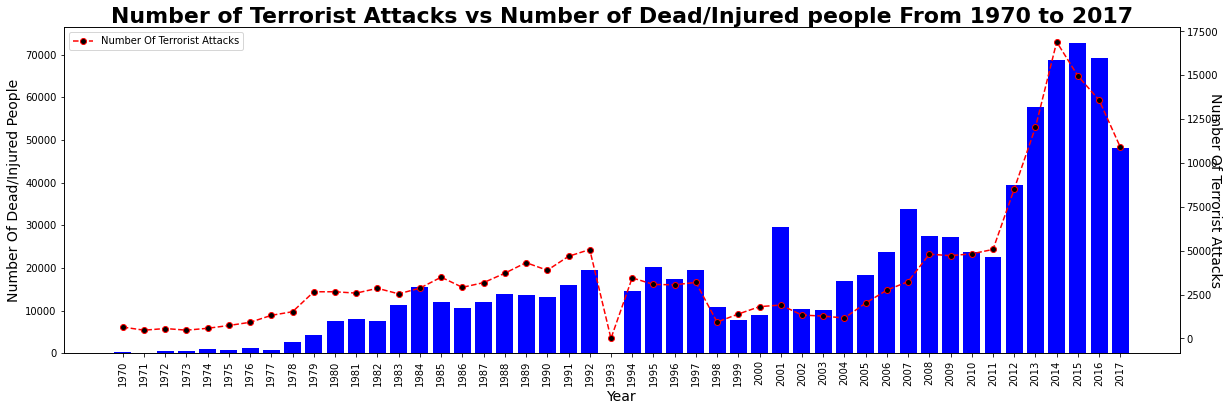

In [104]:
#Filter Data to choose the Number Of Dead/Injured People In Terrorist Attacks From 1970 to 2017

people_damage = data[["Year","Damage"]].groupby('Year').sum()
list_year =  data["Year"].unique().tolist()

# 1. BAR CHART
fig, ax1 = plt.subplots(figsize = (20,6))
ax1.bar(people_damage.index, [i[0] for i in people_damage.values], color= 'b' )

ax1.set_xticklabels(np.arange(1970, 2018, step=1), rotation=90)
ax1.set_ylabel('Number Of Dead/Injured People', size = 14)
ax1.set_xlabel('Year', size = 14)
ax1.set_title('Number of Terrorist Attacks vs Number of Dead/Injured people From 1970 to 2017', fontsize= 22, pad= -50
              , weight ='bold', color = 'k')
ax2 = ax1.twinx()

#Filtering & getting the number of terrorist attacks in the world from 1970 to 2017 
number_attack = []
for year in list_year:
    number_attack.append(len(data[data['Year'] == year][["Year"]]))
number_attack.insert(23, 0)

# 2. PLOT CHART
ax2.set_ylabel('Number Of Terrorist Attacks', size = 14,rotation=-90)
ax2.plot(range(1970, 2018), number_attack, 'r--o', mfc='k', label='Number Of Terrorist Attacks')

plt.xticks(np.arange(1970, 2018, step=1))
plt.legend(loc='upper left')
plt.show()

This graph show the number of global terrorist attacks and number of dead/injured people by year from 1970 to 2017. 

* Overall, the number of attacks is increasing. 
* The number of dead/injured people also increases respectively. 
* The number of attack increased significantly from 2012 to 2015. 
* The year 2015 is an unlucky year with nearly 17000 reported (Highest) terrorist attacks.

# Analysing the Types of Terrorist Attack and Damage #


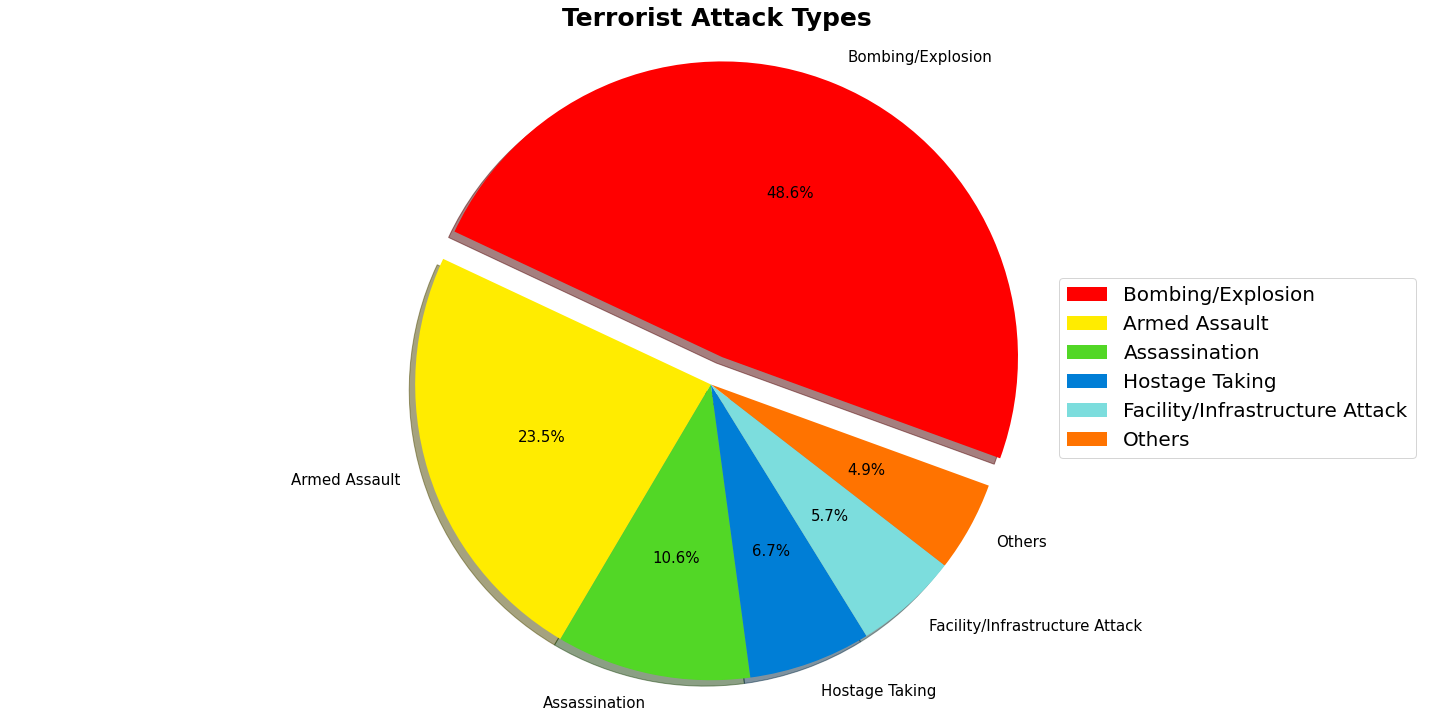

In [105]:
atk_filtered =data['Attacktype'].apply(lambda x: x if x in ['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking',
                                                            'Facility/Infrastructure Attack'] else 'Others')
attack_type = atk_filtered.value_counts().tolist()

# PIE CHART on types of Terrorist Attacks
labels = ['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack','Others']
sizes = []

for i in attack_type:
    percent = i*100/len(data['Attacktype'])
    sizes.append(percent)

fig, ax = plt.subplots(figsize=(20,10))
patches, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle = -20, shadow = True, explode = (0.1, 0, 0, 0, 0, 0),
        colors = ['#FF0000','#FFEC00','#52D726','#007ED6','#7CDDDD','#FF7300'],
        textprops={'fontsize':15,'color':'k'})


ax.axis('equal')
plt.title('Terrorist Attack Types', fontsize= 25, pad= -50, weight ='bold', color = 'k') 
plt.tight_layout()
ax.legend(loc='right',prop={"size":20})
fig.show()

In [106]:
# Create table_1 about Attack types and number of Dead/Injured People

table_1 = data[['Attacktype','Damage']].groupby('Attacktype',as_index = False).sum().sort_values(by='Damage', ascending=False)
table_1 = table_1.reset_index()

inci = [88255,42669,7276,19312,12149,659,1015,10356]
table_1["Incidents"] = np.array(inci)

table_1["Damage_rate"] = table_1["Damage"]/table_1["Incidents"]
table_1

,index,Attacktype,Damage,Incidents,Damage_rate
0,2,Bombing/Explosion,514233.0,88255,5.826673
1,0,Armed Assault,212386.0,42669,4.977525
2,7,Unknown,39606.0,7276,5.443375
3,1,Assassination,37209.0,19312,1.926729
4,5,Hostage Taking,27732.0,12149,2.282657
5,4,Hijacking,20642.0,659,31.323217
6,6,Unarmed Assault,14791.0,1015,14.572414
7,3,Facility/Infrastructure Attack,6293.0,10356,0.607667


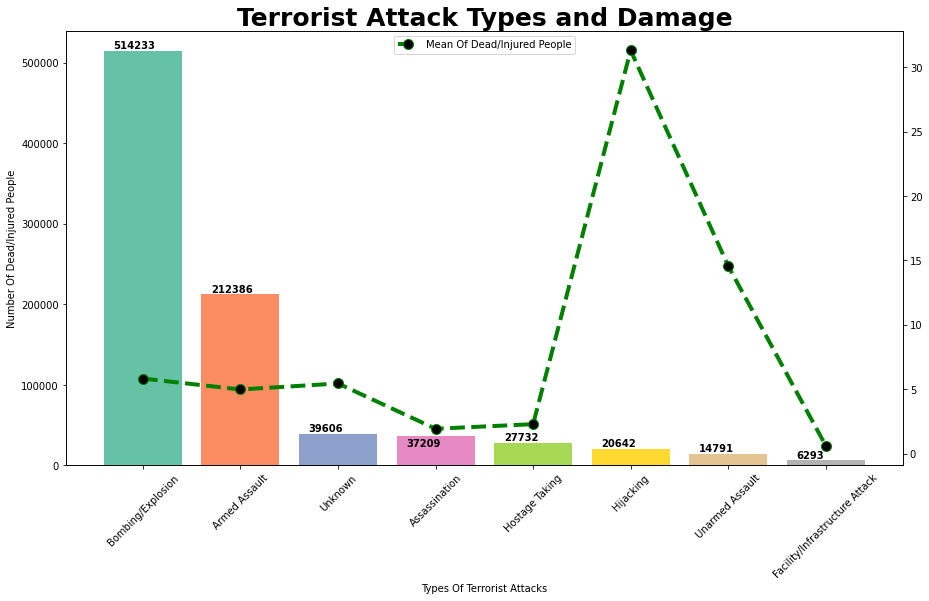

In [108]:
# Draw chart of Terrorist Attack Types and the Damage
labels = table_1['Attacktype'].tolist()
x = np.arange(len(labels)) 
dmg = table_1['Damage'].tolist()

d_rate = table_1["Damage_rate"].tolist()
fig, ax1 = plt.subplots(figsize=(15,8))

# 1. BAR CHART
ax1.bar(labels, dmg,color = sns.color_palette("Set2", 8)[:8], align='center')

# Number in bar chart
for i,v in enumerate(dmg):
    ax1.text(i-0.3, v-13000 if v==37209 else v+3000, str(round(v)), color='k',fontweight='bold')


# 2. LINE PLOT
ax2 = ax1.twinx()
ax2.plot(labels, d_rate, linestyle='--', linewidth =4, marker ='o',  markerfacecolor='black', markersize =10,
         label='Mean Of Dead/Injured People', color = 'g')

plt.title('Terrorist Attack Types and Damage', fontsize= 25, pad= -50, weight ='bold', color = 'k') 

ax1.set(xlabel='Types Of Terrorist Attacks', ylabel='Number Of Dead/Injured People')

ax1.set_xticklabels(labels, rotation=45)
plt.yticks(fontsize=10)

ax2.legend(loc='upper center') 
fig.show()

* The total number of dead/injured people caused by Bombing/Explosion is the highest (514.233 people) since 48.6% of terrorist attacks belong to this type. 
* However, Hijacking is actually the type of attacks which kills and injures the most number of people per attack (>30 people per attack).
* Facility/Infrastructure Attack type kills the least number of people both in total and per case.

# Analysing the Weapon Types and Damage #


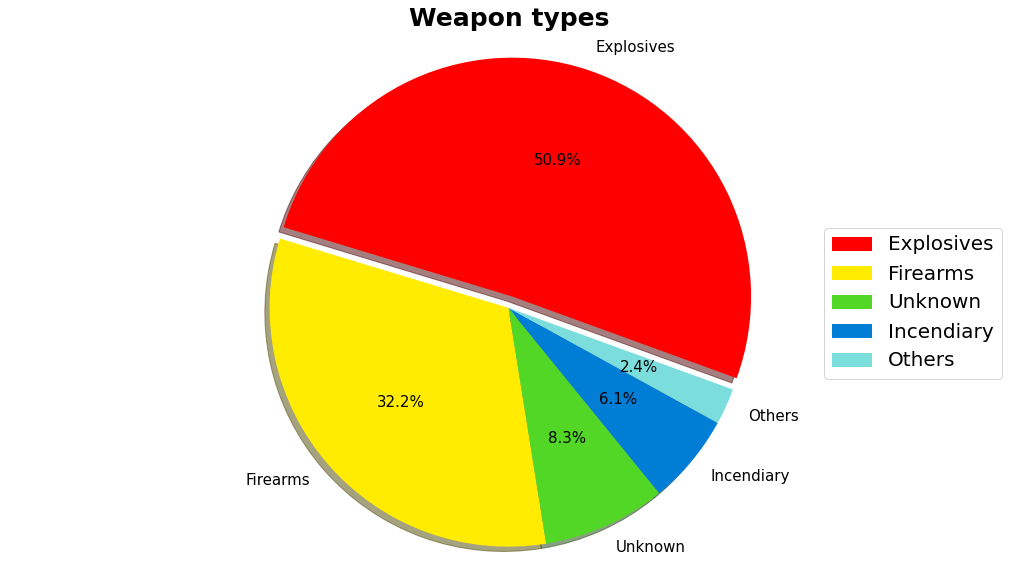

In [109]:
weaptype_filtered =data['Weaptype'].apply(lambda x: x if x in ['Explosives','Firearms','Unknown', 'Incendiary'] else 'Others')
weaptype = weaptype_filtered.value_counts().tolist()

# PIE CHART of weapons types
weap_labels = ['Explosives','Firearms','Unknown','Incendiary','Others']
weap_sizes = []

for j in weaptype:
    percent = j*100/len(data['Weaptype'])
    weap_sizes.append(percent)

fig, ax = plt.subplots(figsize=(18,10))
patches, texts, autotexts = ax.pie(weap_sizes, labels=weap_labels, autopct='%1.1f%%',
        startangle = -20, shadow = True, explode = (0.05, 0, 0, 0, 0), colors = ['#FF0000','#FFEC00','#52D726','#007ED6','#7CDDDD'],
        textprops={'fontsize':15,'color':'k'})

ax.axis('equal')
plt.title('Weapon types', Fontsize= 25, pad= -50, weight ='bold', color = 'k')

ax.legend(loc='right',prop={"size":20})
fig.show()

In [110]:
# Create table_2 about Weapon types and number of Dead/Injured People
table_2 = data[['Weaptype','Damage']].groupby('Weaptype',as_index = False).sum().sort_values(by='Damage', ascending=False)
df_count = data['Weaptype'].value_counts()
df_count = df_count.reindex(table_2['Weaptype'].values)
table_2['WeapCount'] = df_count.values
table_2["Weap_damage_rate"] = table_2["Damage"]/table_2["WeapCount"]
table_2

,Weaptype,Damage,WeapCount,Weap_damage_rate
2,Explosives,537788.0,92426,5.818579
4,Firearms,225473.0,58524,3.852659
10,Unknown,50167.0,15157,3.309824
11,Vehicle,20297.0,136,149.242647
6,Melee,14489.0,3655,3.964159
1,Chemical,14377.0,321,44.788162
5,Incendiary,8898.0,11135,0.799102
0,Biological,814.0,35,23.257143
9,Sabotage Equipment,357.0,141,2.531915
7,Other,225.0,114,1.973684


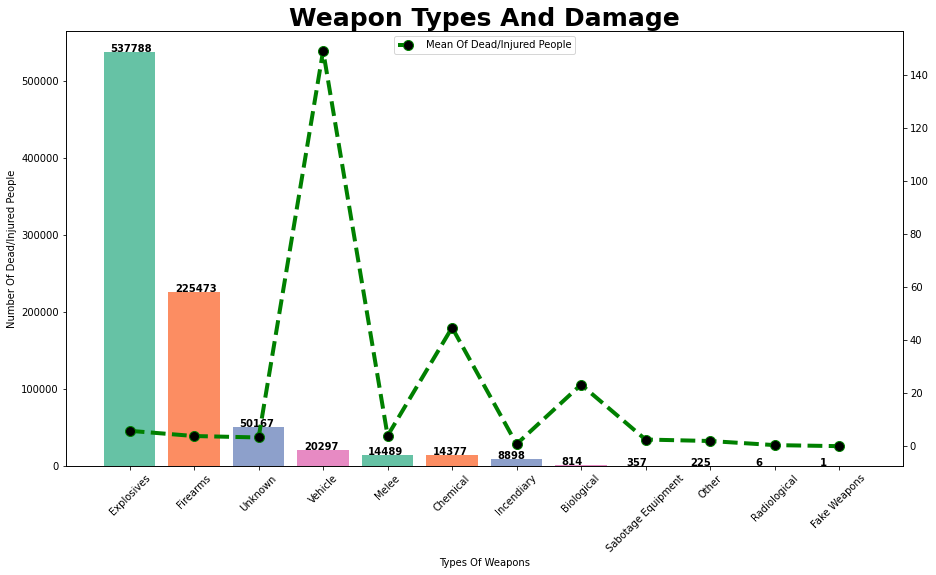

In [111]:
# Draw chart of Weapons Types and Damage

weap_labels = table_2['Weaptype'].tolist()
y = np.arange(len(weap_labels)) 
weap_dmg = table_2['Damage'].tolist()

w_rate = table_2["Weap_damage_rate"].tolist()
fig, ax1 = plt.subplots(figsize=(15,8))

# 1. BAR CHART
ax1.bar(weap_labels, weap_dmg, color = sns.color_palette("Set2", 4)[:4], align='center')

# Number in Bar Chart
for i,v in enumerate(weap_dmg):
    ax1.text(i-0.3, v, str(round(v)), color='k', fontweight='bold')


# 2. LINE PLOT
ax2 = ax1.twinx()
ax2.plot(weap_labels, w_rate, linestyle='--', linewidth =4, marker ='o', markerfacecolor='k', markersize =10,
         label='Mean Of Dead/Injured People',color = 'g')

plt.title('Weapon Types And Damage', fontsize= 25, pad= -50, weight ='bold', color = 'k') 

ax1.set(xlabel='Types Of Weapons', ylabel='Number Of Dead/Injured People')

ax1.set_xticklabels(weap_labels, rotation=45)

plt.yticks(fontsize=10)

ax2.legend(loc='upper center') 
fig.show()

* Explosives and Firearms are the two most popular choice of terrorist attacks. However, the damage they cause per case are less than Vehicle, Chemical, and Biological weapons.

# Data analysis of Global Terrorism from 2000 to 2017 #


In order to avoid Terrorist Attacks and look for the best place to live, we should focus on the situation of each country in the last 2 decades.

## Top 20 Countries with the Highest Number of Dead/Injured people in the World from 2000 to 2017. ##

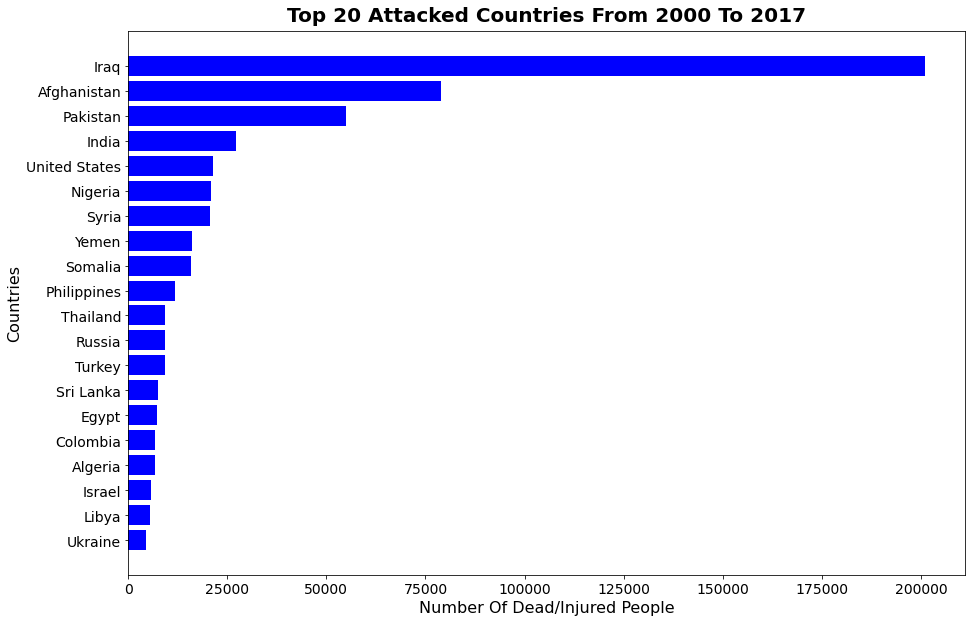

In [113]:
#Choose column Country and Damage from Data

country_damage = data[data['Year'] > 1999][["Country", "Damage"]].groupby('Country',as_index=False).sum()
data_paint = country_damage.sort_values(by='Damage', ascending = False).head(20)

#Paint the bar chart
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(data_paint["Country"][::-1], data_paint["Damage"][::-1], color = 'b')
plt.xticks(size=14)
plt.yticks(size=14)
ax.set_ylabel('Countries', size=16)
ax.set_xlabel('Number Of Dead/Injured People', size=16)
plt.title("Top 20 Attacked Countries From 2000 To 2017", fontsize= 20, pad= 10, weight ='bold', color = 'k')
plt.show()

## Top 20 targeted Countries with the Highest Number of Dead/Injured People from 2000 to 2017. ##


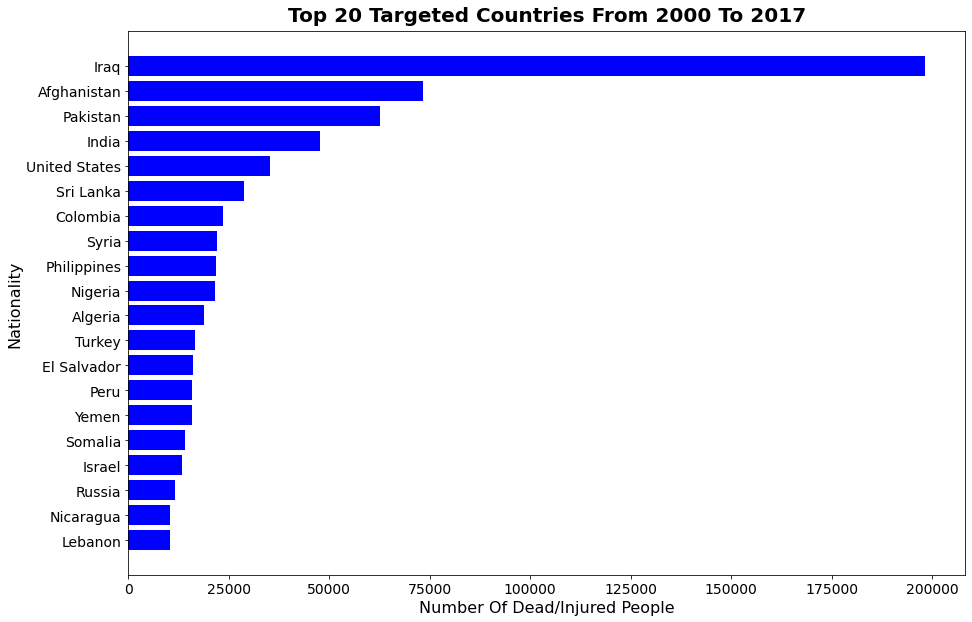

In [114]:
#Choose column Country and Damage from data
nalty_damage = data[["Natlty1", "Damage"]].groupby('Natlty1', as_index=False).sum()
data_paint_natlty = nalty_damage.sort_values(by='Damage', ascending = False).head(20)
fig, ax = plt.subplots(figsize=(15, 10))

#Paint bar chart
ax.barh(data_paint_natlty["Natlty1"][::-1], data_paint_natlty["Damage"][::-1], color = 'b')
plt.xticks(size=14)
plt.yticks(size=14)
ax.set_ylabel('Nationality', size=16)
ax.set_xlabel('Number Of Dead/Injured People', size=16)
plt.title("Top 20 Targeted Countries From 2000 To 2017", fontsize= 20, pad= 10, weight ='bold', color = 'k')

plt.show()

Before taking a look at the top 10 safest countries, we should take a look at top 10 most targerted Countries and Nationalities. 
* Top 4 most targeted countries and nationalities are still Iraq, Afganistan, Pakistan and India.Unfortunately, the situation has not improved in the last 2 decades for these countries.

## Identifying the Safest countries from 2000 to 2017 which have 0 dead/injured people caused by Terrorist Attacks. ##


In [115]:
#Filter from dataframe country_damage
country_damage[country_damage["Damage"]==0]

,Country,Damage
9,Bahamas,0.0
14,Belize,0.0
34,Cyprus,0.0
64,Iceland,0.0
105,New Zealand,0.0
117,Portugal,0.0
129,Slovenia,0.0
139,Swaziland,0.0
147,Togo,0.0
160,Vietnam,0.0


# Case Study: US Terror Attacks and Death Injuries. #

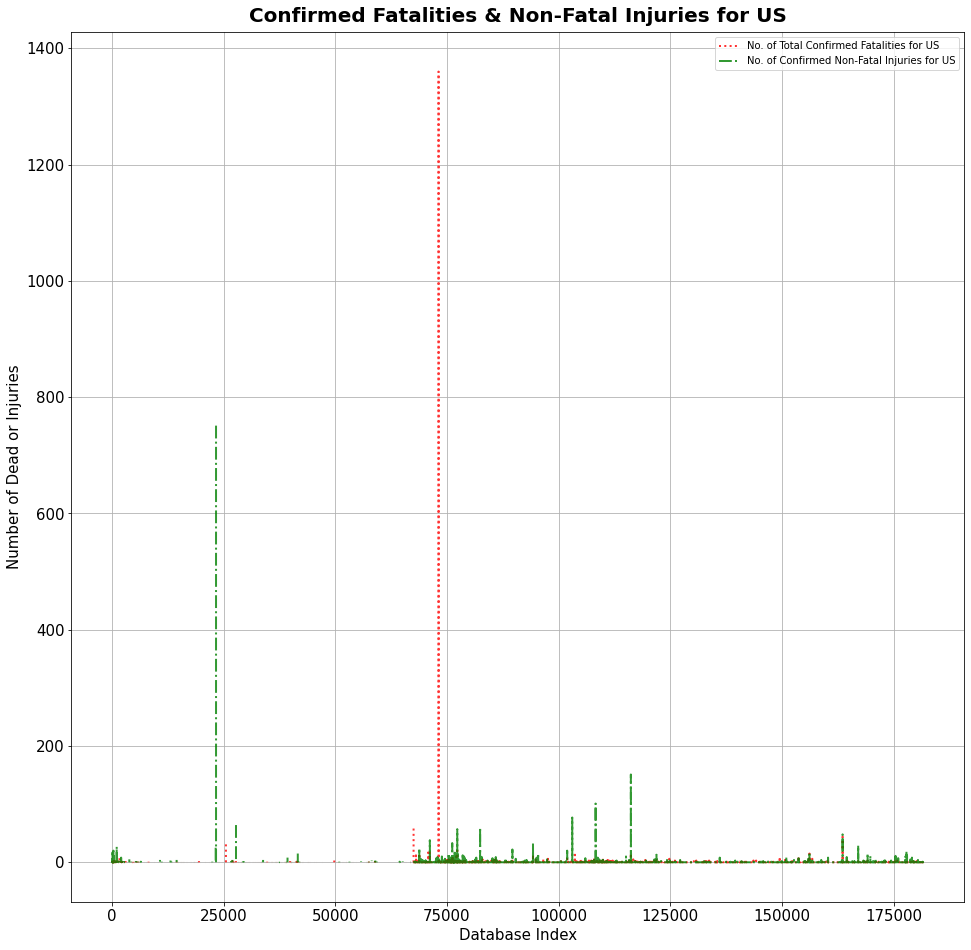

In [116]:
df.Nkillus.plot(kind = 'line', color = 'red', label = 'No. of Total Confirmed Fatalities for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = ':', figsize = (16,16), fontsize=15)
df.Nwoundus.plot(color = "green", label = 'No. of Confirmed Non-Fatal Injuries for US', linewidth = 2, alpha = 0.8, grid = True, 
                 linestyle = '-.', figsize = (16,16), fontsize=15)

plt.legend(loc='upper right')     
plt.xlabel('Database Index', fontsize=15)
plt.ylabel('Number of Dead or Injuries', fontsize=15)

plt.title('Confirmed Fatalities & Non-Fatal Injuries for US', fontsize= 20, pad= 10, weight ='bold', color = 'k')

plt.show()

Given that the data is sorted by dates, attack on US citizens seem to be very rare in a given date range but the terrorist act against the citizens of US has been increasingly in the following year after this rare date range.

By finding the date of the start of the increase, the factors in increasing terrorist acts can be easily identified by taking into account the changes and developments in the country after this date.

# RESULT AND CONCLUSION #

* Country with the highest number of Terrorist Attacks: Iraq
* Regions with the highest number of  Terrorist Attacks: Middle East & North Africa
* Maximum number of people were killed by a single terrorist attack are 1570.0 people that took place in Iraq
                            
* Maximum number of people killed in an event were:  411868.0
* Maximum number of people wounded in an event were:  523869.0
* Maximum number of total Casualities in an event :  872892.0
* From the graph showing the total number of global terrorist attacks and number of dead/injured people by year from 1970 to 2017, we can conclude that -

 1. Overall, the number of attacks is increasing.
 2. The number of dead/injured people also increases respectively.
 3. The number of attack increased significantly from 2012 to 2015.
 4. The year 2015 is an unlucky year with nearly 17000 reported (Highest) terrorist attacks.

* The total number of dead/injured people caused by Bombing/Explosion is the highest (514.233 people) since 48.6% of terrorist attacks belong to this type. 
* However, Hijacking is actually the type of attacks which kills and injures the most number of people per attack (>30 people per attack).
* Facility/Infrastructure Attack type kills the least number of people both in total and per case.

* Explosives and Firearms are the two most popular choice of terrorist attacks. However, the damage they cause per case are less than Vehicle, Chemical, and Biological weapons.
* Top 4 most Targeted & Attacked countries and nationalities are still Iraq, Afganistan, Pakistan and India.
* Some of the safest countries which have 0 dead/injured people caused by Terrorist Attacks - Cyprus, Vietnam, Bahamas, Portugal, etc.
